# Classifiers, Autoencoders, Transfer Learning and More...


ChatGPT

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Example image from the dataset:

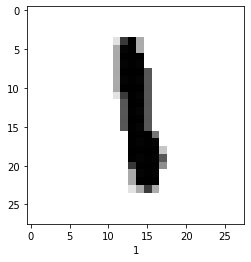

In [ ]:
image_index = 200

plt.figure()
plt.imshow(train_images[image_index], cmap=plt.cm.binary)
plt.xlabel(train_labels[image_index])
plt.show()

Convert to a more usable format 

In [ ]:
train_images = (train_images / 255.0).astype("float32") 
test_images = (test_images / 255.0).astype("float32")

# 255 => 1 
# 0 => 0 
# 127.5 => 0.5

# Define the model 

Autoencoders typically compress the data before decompressing it. 


In [ ]:
image_width = train_images.shape[1]
image_height = train_images.shape[2]

train_images.shape

(60000, 28, 28)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(image_width, image_height)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax()
])

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
)

In [ ]:
stats = model.fit(
  train_images, 
  train_labels,
  epochs=10,
  verbose= False
)

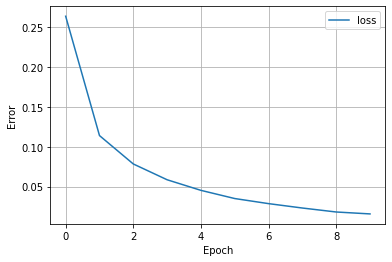

In [ ]:
plt.plot(stats.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

In [ ]:
predict_value = 1

prediction_first_val = model.predict(np.array([test_images[predict_value]]))

print(prediction_first_val[0])
print()
print(sum(prediction_first_val[0]))

1/1 [==============================] - 0s 76ms/step
[2.5871413e-11 2.2921474e-06 9.9999762e-01 2.8009747e-08 4.1171630e-19
 3.7239406e-08 1.1322450e-11 1.7253710e-15 3.9774339e-09 1.1255715e-16]

0.9999999772254207


Get the predicted value: 

In [ ]:
print(np.argmax(prediction_first_val), test_labels[predict_value])

2 2


# Autoencoders

**Generative machine learning**

Rather than discriminative

In [ ]:
latent_dim = 32

reduction = (latent_dim - (image_width * image_height)) / (image_width * image_height)

print(f"{abs(reduction * 100)}%")

95.91836734693877%


In [ ]:
class Autoencoder(tf.keras.models.Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()

    self.encoder = tf.keras.Sequential([
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(128, activation='relu'),
       tf.keras.layers.Dense(latent_dim, activation='relu'),
    ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(image_width * image_height, activation='sigmoid'),
      tf.keras.layers.Reshape((image_width, image_height))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [ ]:
autoencoder = Autoencoder(latent_dim)

In [ ]:
autoencoder.compile(optimizer='adam', loss="mean_squared_error")

In [ ]:
stats = autoencoder.fit(
    train_images, 
    train_images,
    epochs=10,
    shuffle=True,
    validation_data=(test_images, test_images)
)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0252 - val_loss: 0.0138
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0125 - val_loss: 0.0109
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0106 - val_loss: 0.0099
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0091 - val_loss: 0.0087
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0087 - val_loss: 0.0084
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0084 - val_loss: 0.0081
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0081 - val_loss: 0.0078
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0079 - val_loss: 0.0078
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.00

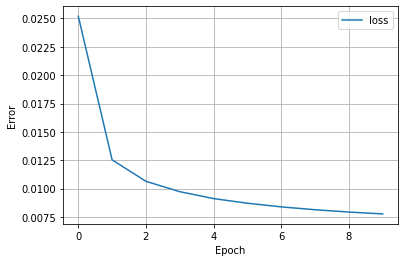

In [ ]:
plt.plot(stats.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

Try compression and then decompression

In [ ]:
encoded_imgs = autoencoder.encoder(test_images).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

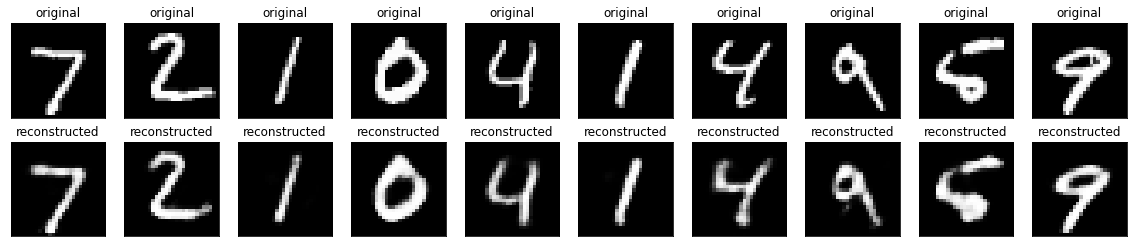

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(test_images[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

**Transfer Learning**

Finetuning previous models that have been pretrained

Less boring wait times

In [ ]:
transfer_model = tf.keras.Sequential([
    autoencoder.encoder,
    tf.keras.layers.Dense(2),
    tf.keras.layers.Softmax()
])

In [ ]:
transfer_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
binary_data = np.array([
    0 if x < 5 else 1 
    for x in train_labels
])

print(binary_data)

[1 0 0 ... 1 1 1]


In [ ]:
stats_v3 = transfer_model.fit(
  train_images, 
  binary_data,
  epochs=1,
  verbose= True
)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.1927 - accuracy: 0.9360


In [ ]:
image_to_predict = 50

image = np.array([test_images[image_to_predict]])


prediction_first_val_v2 = transfer_model.predict(image)

print(f"VALUE: \t\t{test_labels[image_to_predict]}")
print(f"PREDICTION: \t{np.argmax(prediction_first_val_v2)}")

1/1 [==============================] - 0s 76ms/step
VALUE: 		6
PREDICTION: 	1
